**NOTE: This notebook is written for the Google Colab platform. However it can also be run (possibly with minor modifications) as a standard Jupyter notebook.**

In [0]:
#@title -- Import of Necessary Packages -- { display-mode: "form" }
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
#@title -- Downloading Data -- { display-mode: "form" }
!mkdir -p output
!mkdir -p data/adult_income
!wget -nc -O data/adult_income.zip https://www.dropbox.com/s/077gouf58kvzsuc/adult_income.zip?dl=1
!unzip -oq -d data/adult_income data/adult_income.zip

--2020-04-21 12:59:45--  https://www.dropbox.com/s/077gouf58kvzsuc/adult_income.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/077gouf58kvzsuc/adult_income.zip [following]
--2020-04-21 12:59:45--  https://www.dropbox.com/s/dl/077gouf58kvzsuc/adult_income.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15d25edbe1ced835bd8f42c905.dl.dropboxusercontent.com/cd/0/get/A2TxJ94xqVbrSjwp2eCoX0ws5qv6R4rzfQvoo7y-Bw1W2DYLq6fyzB_1g_As_LqNFFh7dlFjuwvAIXEE-cYTYUvAErKGwodsD2Y-s6SoJqmqeqmf3dlmvur1evaRodOqJY8/file?dl=1# [following]
--2020-04-21 12:59:45--  https://uc15d25edbe1ced835bd8f42c905.dl.dropboxusercontent.com/cd/0/get/A2TxJ94xqVbrSjwp2eCoX0ws5qv6R4rzfQvoo7y-Bw1W2DYLq6fyzB_1g_As_LqNFFh7dlFjuwvAIXEE-cYTYUvAErKGwodsD2Y-

# Decision Trees Classifier: The Adult Income Dataset

Having shown how to apply a decision tree classifier to the Titanic dataset, we will now go over one more example: we will apply it to the [Adult Income Dataset](https://archive.ics.uci.edu/ml/datasets/adult). Since this is again a dataset that we have already worked with, the code to load and preprocess the data is in the next cell and it is hidden for conciseness.

In [0]:
#@title -- Loading and Preprocessing the Data: X_train, Y_train, X_test, Y_test -- { display-mode: "form" }
df_train = pd.read_csv("data/adult_income/adult.data",
                       header=None)
df_test = pd.read_csv("data/adult_income/adult.test",
                      header=None, skiprows=1)
df_test[14] = df_test[14].apply(lambda x: x[:-1])
    
categorical_inputs = [1, 3, 5, 6, 7, 8, 9, 13]
numeric_inputs = [0, 2, 4, 10, 11, 12]

output = 14

input_preproc = make_column_transformer(
    (make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OrdinalEncoder()),
     categorical_inputs),
    
    (make_pipeline(
        SimpleImputer(),
        StandardScaler()),
     numeric_inputs)
)

output_enc = OrdinalEncoder()
    
X_train = input_preproc.fit_transform(df_train)
Y_train = output_enc.fit_transform(df_train[[output]]).reshape(-1)

X_test = input_preproc.transform(df_test)
Y_test = output_enc.transform(df_test[[output]]).reshape(-1)

---

## Task 1: Apply a Decision Tree Classifier, Tuning Its Hyperparameters

**The dataset is stored in arrays ``X_train``, ``Y_train``, ``X_test``, ``Y_test``. Apply a decision tree classifier to it and tune its hyperparameters using cross-validation on the training set. Once the hyperparameters are tuned, retrain the final model on the entire training set.**

NOTE 1: You might be tempted to just reuse the hyperparameters from the previous example. And they might work. However, note that in general optimal hyperparameters do depend on the dataset and not just on the model.

NOTE 2: Be careful when plotting the model. Unless you apply sufficient pruning, the tree may be too large to be visualized conveniently and its plotting may take an excessive amount of time.

---

Cross-validation accuracy = 0.8538744095630324


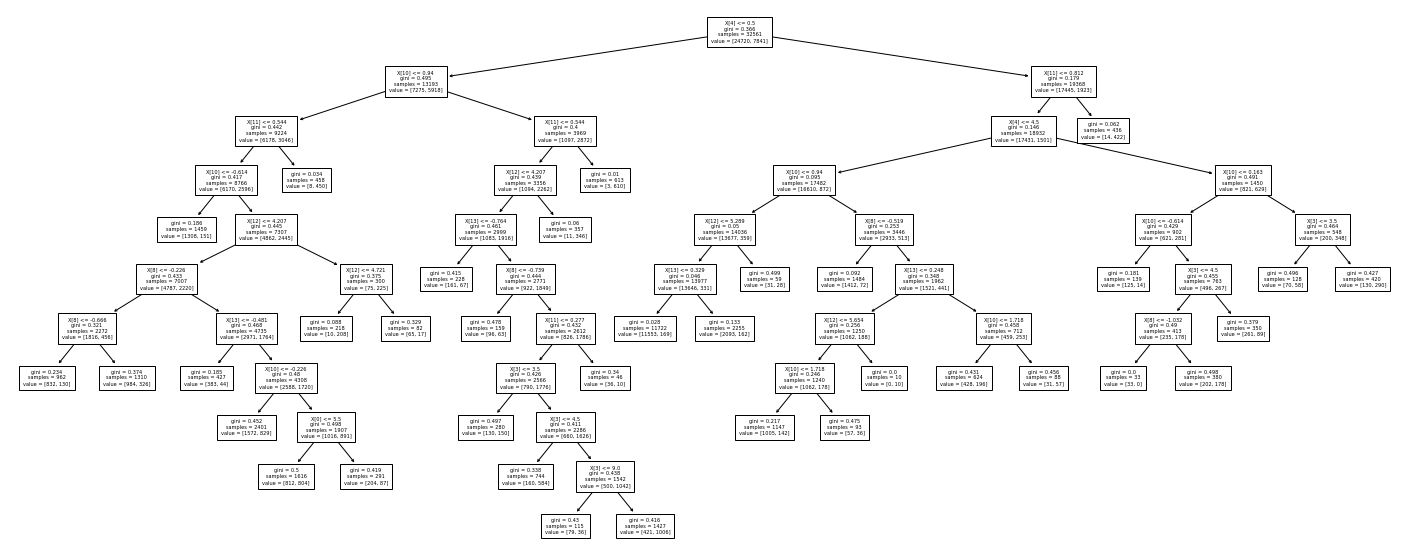

In [107]:
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(
      
      
    max_leaf_nodes = 35
      
      
)

acc = cross_validate(model, X_train, Y_train, cv=5)['test_score'].mean()
print("Cross-validation accuracy = {}".format(acc))

# we need to fit the model before we plot it
model.fit(X_train, Y_train)

plt.figure(figsize=(25,10))
plot_tree(model, fontsize=5);


## Testing

Having tuned and trained the model, we can now proceed to verify generalization on the testing set.

In [108]:
y_test = model.predict(X_test)

cm = pd.crosstab(Y_test, y_test,
                 rownames=['actual'],
                 colnames=['predicted'])
print(cm, "\n")

acc = accuracy_score(Y_test, y_test)
print("Accuracy = {}".format(acc))

predicted    0.0   1.0
actual                
0.0        11966   469
1.0         1855  1991 

Accuracy = 0.8572569252502917
